In [1]:
import os
os.chdir("/content/drive/MyDrive/Machine Learning Projects/Stroke Prediction")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data 📥

In [3]:
# Read the data using pandas
data = pd.read_csv("stroke_prediction_data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### What is the **stroke**?

A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.

In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

Learn about the health conditions and lifestyle habits that can increase your risk for stroke.

-- More information about of [stroke](https://www.cdc.gov/stroke/about.htm#:~:text=A%20stroke%2C%20sometimes%20called%20a,term%20disability%2C%20or%20even%20death.).

**Attribute Information:**
1. **id:** unique identifier
2. **gender:** "Male", "Female" or "Other"
3. **age:** age of the patient
4. **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6.**ever_married:** "No" or "Yes"
7.**work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8.**Residence_type:** "Rural" or "Urban"
9.**avg_glucose_level:** average glucose level in blood
10.**bmi:** body mass index
11.**smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
12.**stroke:** 1 if the patient had a stroke or 0 if not

❗ **Note**: "*Unknown*" in smoking_status means that the information is unavailable for this patient

## Descriptive Statistics

In [4]:
# What kind of data types we have?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We have **5110** instances and **12** attributes. Also we have some missing values in `bmi` attribute.


> Dataset has 3 types: `int64`, `float64` and `object`



### Handling Missing Data 🕵

Firstly, we can check the which attributes have missing values, then we can apply different strategies for handling missing values:


* Delete Row
* Delete Column
* Replace Constant
* Replace Mean

In [5]:
# Check the missing value
for key, value in data.isnull().sum().items():
  if value > 0:
    percent = np.round(value / len(data) *100, decimals=2)
    print(f"'{key}' attribute doesn't have {percent}% of its data.")

'bmi' attribute doesn't have 3.93% of its data.


#### Delete Entire Row

In [6]:
# Delete entire row
delete_rows_df = data.dropna(axis=0)

# Check the shape of the new data
data.shape, delete_rows_df.shape

((5110, 12), (4909, 12))

Original data has 5110 intances, now it has 4909 instance

#### Delete Entire Column

In [7]:
# Delete column
delete_cols_df = data.dropna(axis=1)

# Check the shape of the data
data.shape, delete_cols_df.shape

((5110, 12), (5110, 11))

Before, we had **12** attributes, now we have **11** attributes.

#### Fill the Constant
We can fill the missing values with a constant. For this we can use `pandas` or `sklearn` packages.

In [8]:
# Fill the missing data using pandas
data_fill_constant = data.fillna(value=0)

# Look at the second instance
data_fill_constant["bmi"].head()

0    36.6
1     0.0
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

#### Fill the Average Value

In [9]:
# Fill the missing data using pandas
mean_value = np.mean(data["bmi"])
data_fill_mean = data.fillna(value=np.round(mean_value, decimals=1))

# Look at the second instance
data_fill_mean["bmi"].head()

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

I want to delete all rows because the data has almost five thousand instance after deleting. It's okey 👌

In [10]:
# Deleting all missing row
data = data.dropna(axis=0)

### Describe Information

Some of the columns data type has integer but they don't have any meaning with statistically. `stroke`,`hypertension` and `heart_disease` attributes has boolean data.

In [11]:
# Convert from numerical to categorical
data["hypertension"] = data["hypertension"].astype("category")
data["heart_disease"] = data["heart_disease"].astype("category")

In [12]:
# Describe statistic
data.describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
id,4909.00,37064.31,20995.10,77.00,18605.00,37608.00,55220.00,72940.00
age,4909.00,42.87,22.56,0.08,25.00,44.00,60.00,82.00
avg_glucose_level,4909.00,105.31,44.42,55.12,77.07,91.68,113.57,271.74
bmi,4909.00,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,4909.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4909 non-null   int64   
 1   gender             4909 non-null   object  
 2   age                4909 non-null   float64 
 3   hypertension       4909 non-null   category
 4   heart_disease      4909 non-null   category
 5   ever_married       4909 non-null   object  
 6   work_type          4909 non-null   object  
 7   Residence_type     4909 non-null   object  
 8   avg_glucose_level  4909 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     4909 non-null   object  
 11  stroke             4909 non-null   int64   
dtypes: category(2), float64(3), int64(2), object(5)
memory usage: 431.7+ KB


## Data Visualization 📽

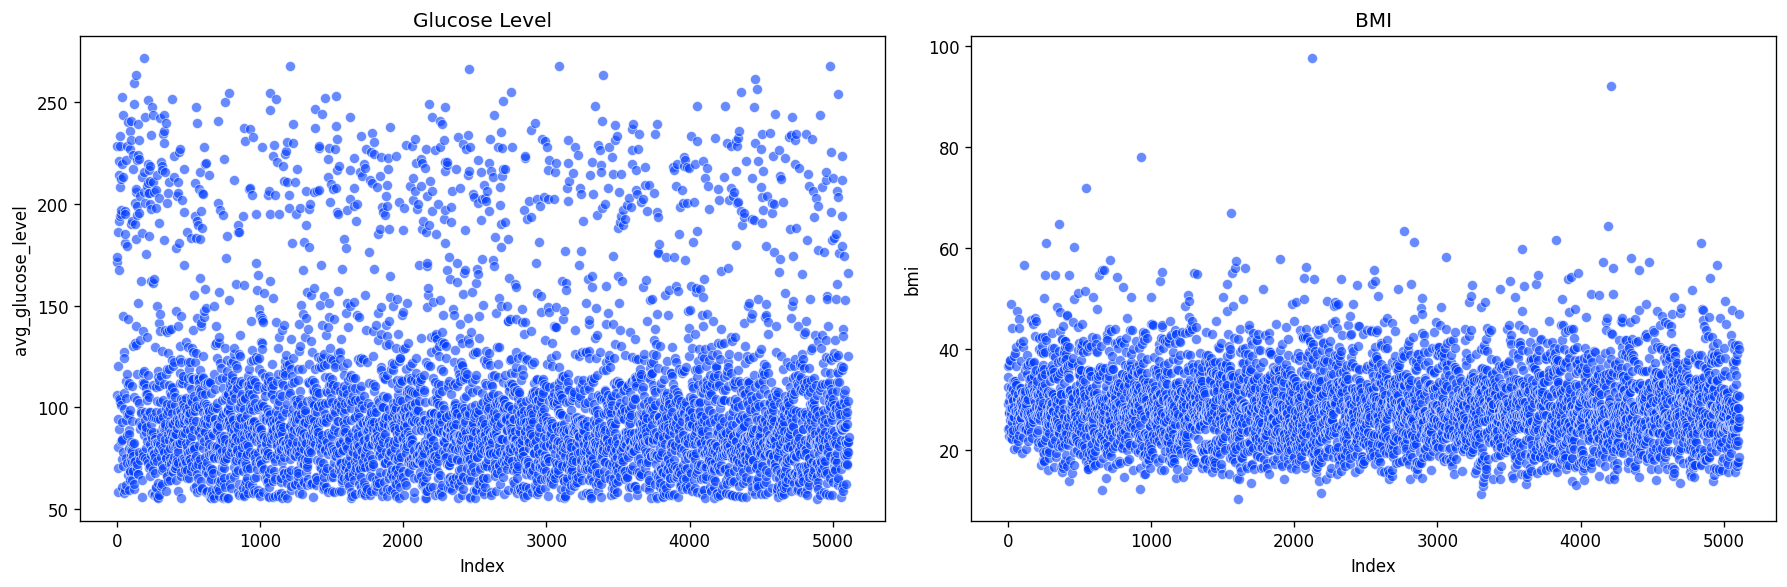

In [14]:
# Scatter Plots
sns.set_palette("bright")
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=120,
                                    sharex=False, sharey=False)

sns.scatterplot(x=data.index, y=data["avg_glucose_level"], alpha=0.6, ax=ax1)
sns.scatterplot(x=data.index, y=data["bmi"], alpha=0.6, ax=ax2)

ax1.set_title("Glucose Level")
ax1.set_xlabel("Index")
ax2.set_title("BMI")
ax2.set_xlabel("Index")

plt.tight_layout()
plt.savefig("scatter_plot_with_outlier.png", dpi=200, bbox_inches="tight")
plt.show()

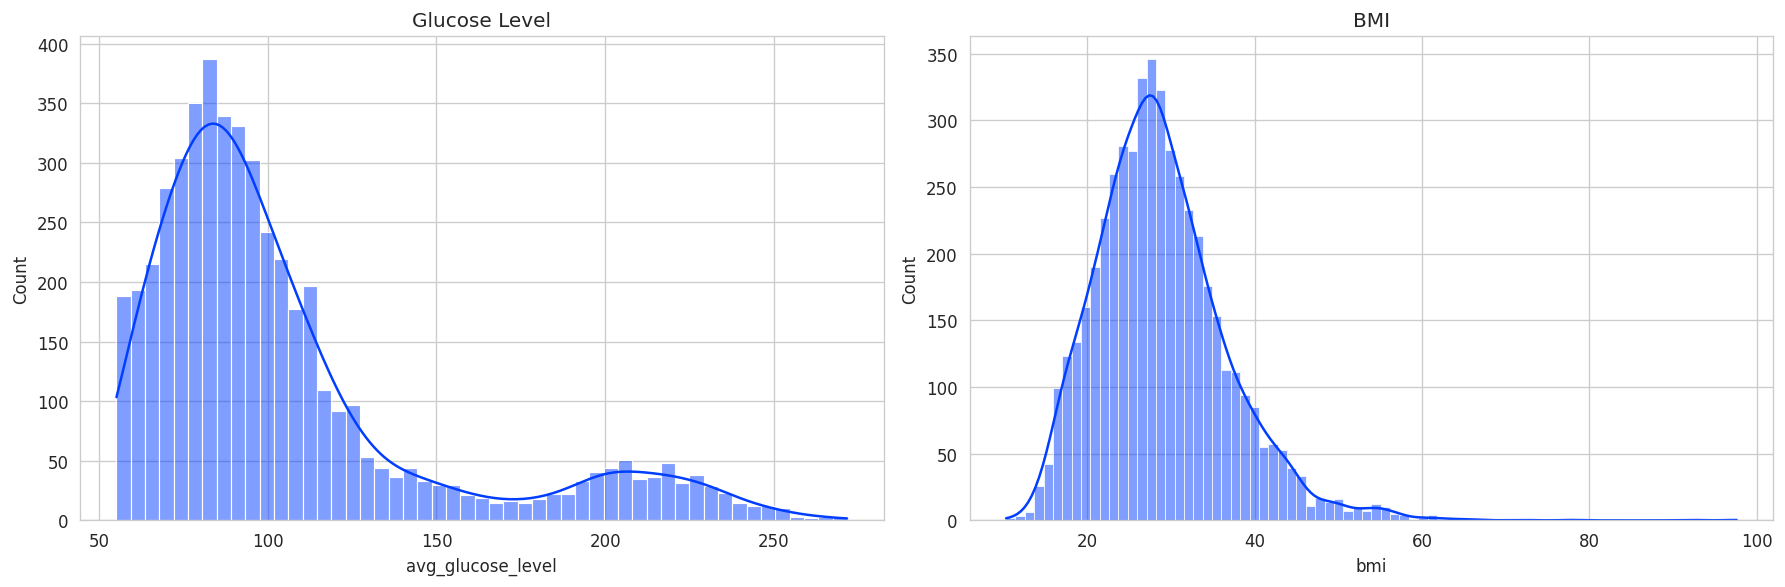

In [15]:
# Histograms
sns.set_style("whitegrid"), sns.set_palette("bright")

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=120,
                                    sharex=False, sharey=False)

sns.histplot(data["avg_glucose_level"], ax=ax1, kde=True)
sns.histplot(data["bmi"], ax=ax2, kde=True)

ax1.set_title("Glucose Level")
ax2.set_title("BMI")

plt.tight_layout()
plt.savefig("histogram_with_outlier.png", dpi=200, bbox_inches="tight")
plt.show()

In [16]:
from scipy import stats

for col in ["avg_glucose_level", "bmi"]:
  # Calculate the z-score each patient's body mass index
  z_scores = np.abs(stats.zscore(data[col]))

  # Identify outliers as patients with a z-score greater than 3
  threshold = 3
  outliers = data[z_scores > threshold]

  # Remove outliers from data
  data.drop(outliers.index, inplace=True)

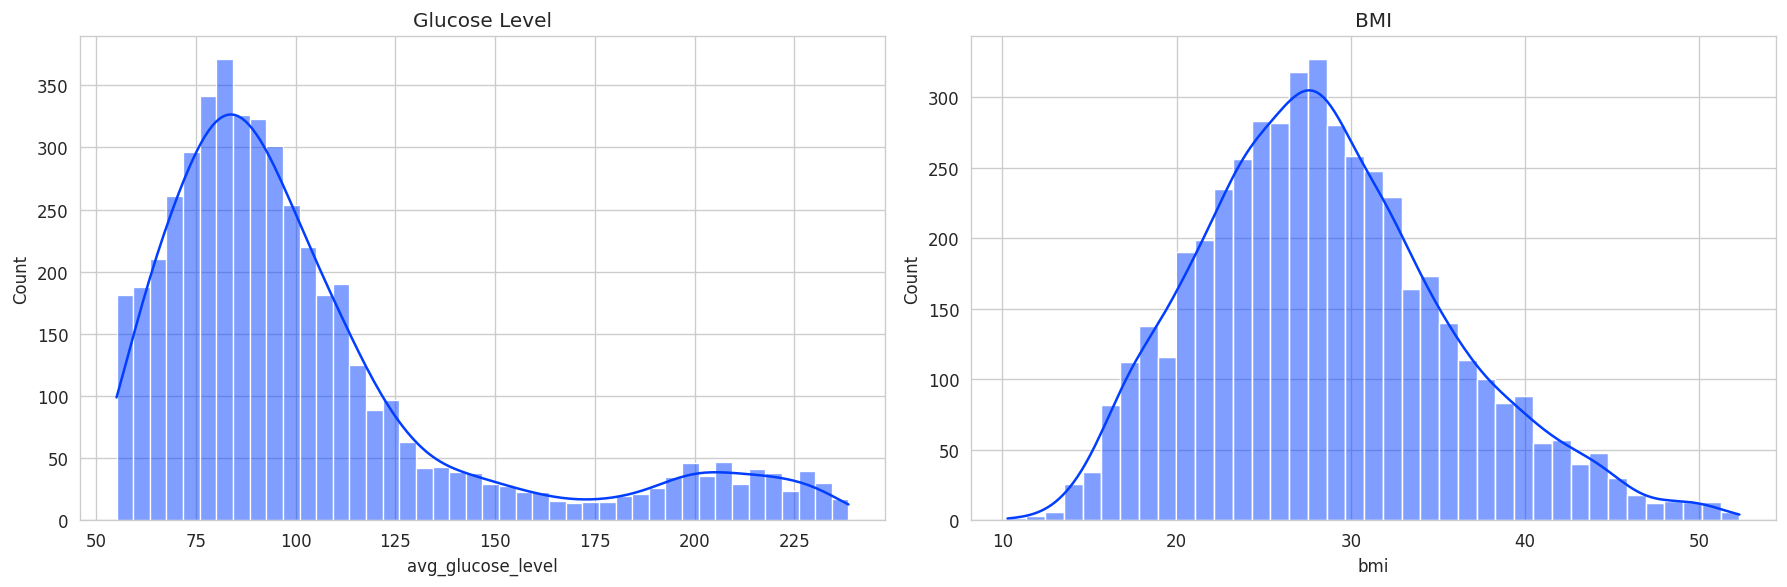

In [17]:
# Histograms
sns.set_style("whitegrid"), sns.set_palette("bright")

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15,5), dpi=120,
                                    sharex=False, sharey=False)

sns.histplot(data["avg_glucose_level"], ax=ax1, kde=True)
sns.histplot(data["bmi"], ax=ax2, kde=True)

ax1.set_title("Glucose Level")
ax2.set_title("BMI")

plt.tight_layout()
plt.savefig("histogram_without_outlier.png", dpi=200, bbox_inches="tight")
plt.show()

We can see the difference between first `bmi` distribution and after the remove outliers.

### Understanding Categorical Attributes

In [18]:
# Look at the 'gender' attribute
data["gender"].value_counts()

Female    2822
Male      1969
Other        1
Name: gender, dtype: int64

In [19]:
# Delete the gender == 'other'
data.drop(data[data["gender"] == "Other"].index, inplace=True)

## Split Data

In [20]:
# Seperate features and target variable
X = data.drop(["stroke", "id"], axis=1)
y = data["stroke"]

In [21]:
# Define which features numerical and categorical
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                'work_type', 'Residence_type','smoking_status']
num_features = ["age", "avg_glucose_level", "bmi"]

In [22]:
# Encode the categorical features
X = pd.get_dummies(X)

In [23]:
# Check target class
for key, value in y.value_counts().items():
  print(f"Target class `{key}` represented {(value/len(y)*100):.2f}% of dataset.")

Target class `0` represented 95.91% of dataset.
Target class `1` represented 4.09% of dataset.


We can see the target variable not balanced. We should balance the data using `imblearn` library. I want to use 3 different type of ver sampling tecnic from this library. *SMOTE*, *ADASYN* and *RandomOverSampling*. More information about [sklearn over sampling](https://imbalanced-learn.org/stable/references/over_sampling.html).

In [24]:
from imblearn.over_sampling import SMOTE

# Define Estimator
smt = SMOTE(random_state=42)

# SMOTE
X_smt, y_smt = smt.fit_resample(X, y)

In [25]:
# SMOTE result
for key, value in y_smt.value_counts().items():
  print(f"Target class `{key}` represented {(value/len(y_smt)*100):.2f}% of dataset.")

Target class `1` represented 50.00% of dataset.
Target class `0` represented 50.00% of dataset.


## Define Model


In [26]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler

# Define a scaler
scaler = StandardScaler()

# Fit and transform train data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

# Define a model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
from sklearn.model_selection import cross_val_score

# Cross-validation the model
scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

# Result for cross validation
avg_acc = np.round(np.mean(scores), decimals=2)
std_acc = np.round(np.std(scores), decimals=5)

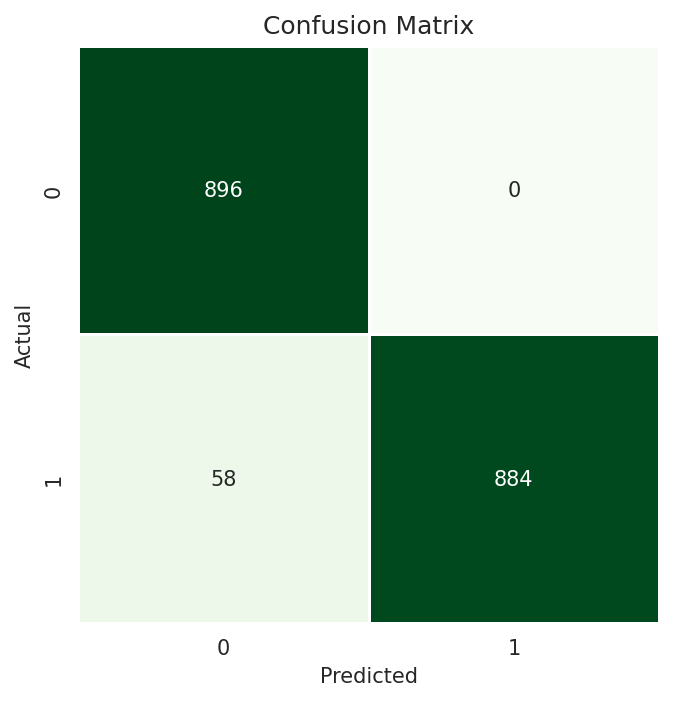

In [30]:
from sklearn.metrics import confusion_matrix

# Make prediction for train data
preds = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", cbar=False,
            lw=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix")
plt.savefig("lg_confusion_matrix.png", bbox_inches="tight", dpi=400)
plt.show()

In [31]:
from sklearn.metrics import classification_report

# Classification Report
cr = classification_report(y_test, preds)

print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       896
           1       1.00      0.94      0.97       942

    accuracy                           0.97      1838
   macro avg       0.97      0.97      0.97      1838
weighted avg       0.97      0.97      0.97      1838

